In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/home/sheetal/Downloads/Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
#Checking whether the dataset has null values

In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
#Correlation

In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
#Boxplot

<AxesSubplot:>

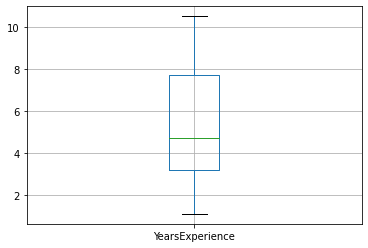

In [10]:
data.boxplot(column=['YearsExperience'])

<AxesSubplot:>

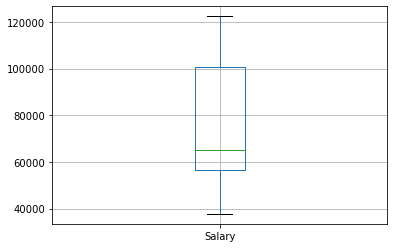

In [11]:
data.boxplot(column=['Salary'])

In [12]:
#Histogram

<AxesSubplot:>

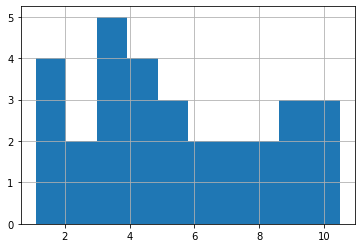

In [13]:
data['YearsExperience'].hist()

<AxesSubplot:>

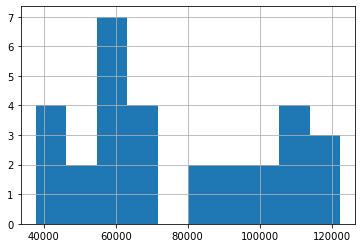

In [15]:
data['Salary'].hist()

In [16]:
#Descriptive stat
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


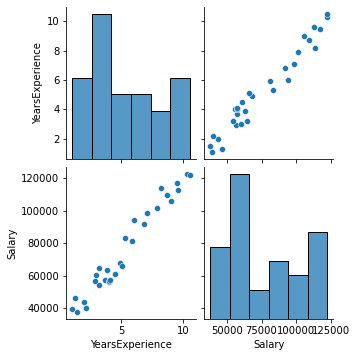

In [17]:
sns.pairplot(data)

/home/sheetal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

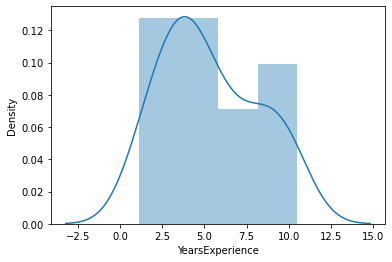

In [18]:
sns.distplot(data['YearsExperience'])

/home/sheetal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

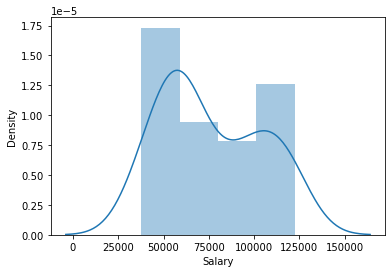

In [19]:
sns.distplot(data['Salary'])

# SLR model

In [20]:
import statsmodels.formula.api as smf
model = smf.ols("data['Salary']~data['YearsExperience']",data = data).fit()

In [21]:
print(model.summary())
prediction = model.predict(pd.DataFrame(data['YearsExperience']))

                            OLS Regression Results                            
Dep. Variable:         data['Salary']   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        15:50:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

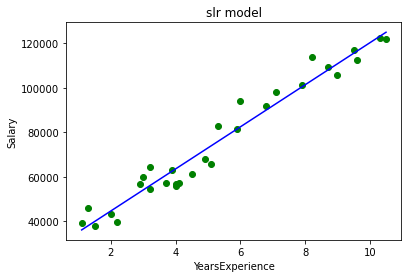

In [22]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='g',marker='o')
plt.plot(data['YearsExperience'],prediction,color='blue')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("slr model")
plt.show()

# Log model

In [23]:
l_model = smf.ols("data['Salary']~np.log(data['YearsExperience'])",data = data).fit()

In [24]:
print(l_model.summary())
prediction_l = l_model.predict(pd.DataFrame(data['YearsExperience']))

                            OLS Regression Results                            
Dep. Variable:         data['Salary']   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           3.25e-13
Time:                        15:50:23   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

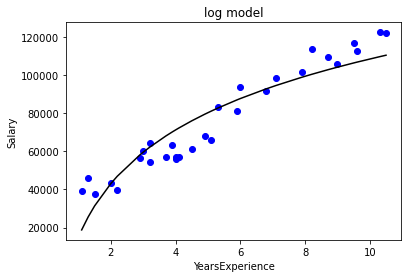

In [25]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='b',marker='o')
plt.plot(data['YearsExperience'],prediction_l,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("log model")
plt.show()

# Exponential Model

In [26]:
e_model = smf.ols("np.log(data['Salary'])~(data['YearsExperience'])",data = data).fit()

In [27]:
print(e_model.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(data['Salary'])   R-squared:                       0.932
Model:                                OLS   Adj. R-squared:                  0.930
Method:                     Least Squares   F-statistic:                     383.6
Date:                    Fri, 12 Mar 2021   Prob (F-statistic):           7.03e-18
Time:                            15:50:28   Log-Likelihood:                 28.183
No. Observations:                      30   AIC:                            -52.37
Df Residuals:                          28   BIC:                            -49.56
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [28]:

e_prediction = e_model.predict(pd.DataFrame(data['YearsExperience']))


In [29]:
e_prediction=np.exp(e_prediction)

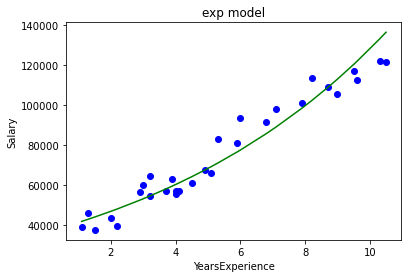

In [30]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='b',marker='o')
plt.plot(data['YearsExperience'],e_prediction,color='green')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("exp model")
plt.show()

# Quadratic equation

In [31]:
data['YearsExperience']=data.YearsExperience*data.YearsExperience
q_model =  smf.ols("data['Salary']~data['YearsExperience']",data=data).fit()

In [32]:
q_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         data['Salary']   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           1.52e-16
Time:                        15:50:35   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
data['YearsExperience']   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
prediction_q = q_model.predict(pd.DataFrame(data['YearsExperience']))

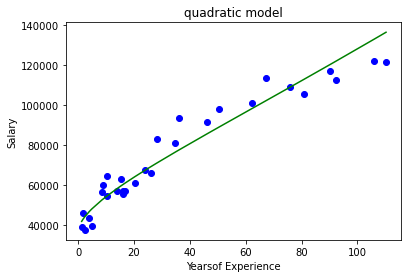

In [35]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='b',marker='o')
plt.plot(data['YearsExperience'],e_prediction,color='green')
plt.xlabel("Yearsof Experience")
plt.ylabel("Salary")
plt.title("quadratic model")
plt.show()